# Pre Session Exercise


#### The company goal is to increase conversion rate: # conversions / total sessions.
####  In order to maximise the conversion rate, we should target maximising # of conversions.

In [1]:
%matplotlib notebook
#Importing the required libraries for the data analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
#Read the data(CSV file) from the local folder and saving it into a dataframe df
df = pd.read_csv("C:/Users/Shriya/Desktop/Insight Data Science/Pre Session Data Exercise/conversion_data.csv")

## Data Exploration and Visualization

In [3]:
#Previewing data in df - top 10 rows
df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


#### The output above shows a snapshot of Conversion Data.

In [4]:
#Checking for nulls in any of the columns of df 
df.apply(lambda x: sum(x.isnull()),axis=0)

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

#### After checking for nulls, no nulls were found! 

In [5]:
#Checking for distinct values in all the columns of df starting with the ddependent variable - Converted

print (df['converted'].value_counts())

0    306000
1     10200
Name: converted, dtype: int64


#### We can see the data set is skewed with converted = 0 comprising 96.77 % of the total while the data  of intereset that is converted = 1 is less than 4% of the total.

In [6]:
print (df['source'].value_counts())

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64


#### The sources fall into 3 different categories - Seo, Ads, Direct. Assessing which source gains maximum conversions and which source has room for improvement.

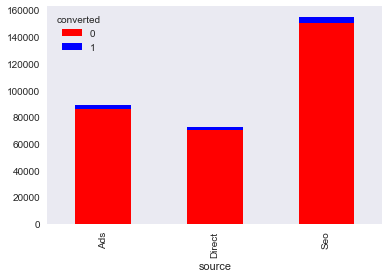

In [7]:
%matplotlib inline
temp = pd.crosstab([df['source']], df['converted'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
pyplot.show()

In [8]:
temp

converted,0,1
source,,
Ads,85680,3060
Direct,70380,2040
Seo,149940,5100


#### Seo as a source seems to be working the best and can be scaled up further. While Direct source shows room for improvement.

In [9]:
print (df['total_pages_visited'].value_counts())

2     43868
3     43829
4     41046
1     40739
5     36308
6     30261
7     23488
8     17522
9     12157
10     8074
11     5394
12     3615
13     2425
14     1811
15     1325
16     1100
17      845
18      722
19      565
20      405
21      296
22      180
23      113
24       46
25       39
26       17
27        7
29        2
28        1
Name: total_pages_visited, dtype: int64


#### Total number of pages visited by a user can fall anywhere between 1 to 29. It is a proxy for time spent on site and engagement during the session. 

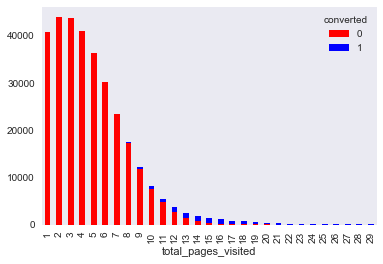

In [10]:
%matplotlib inline
temp = pd.crosstab([df['total_pages_visited']], df['converted'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
pyplot.show()

In [11]:
temp

converted,0,1
total_pages_visited,,
1,40739,0
2,43858,10
3,43818,11
4,41014,32
5,36251,57
6,30157,104
7,23329,159
8,17255,267
9,11755,402


#### The plot shows that the likelihood of conversion increases with increase in time spent increases. So it would be fair to suggest that by increasing engagement the company is likely to increase conversion.

In [12]:
print (df['country'].value_counts())

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64


#### The users belong to 4 countries - US, China, UK, Germany. Majority of whom belong to US.

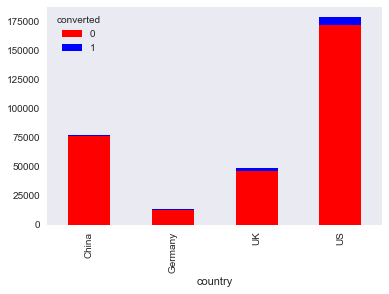

In [13]:
%matplotlib inline
temp = pd.crosstab([df['country']], df['converted'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
pyplot.show()

In [14]:
temp

converted,0,1
country,,
China,76500,102
Germany,12240,816
UK,45900,2550
US,171360,6732


#### Users in US are more likely to be converted. Therefore, it would be advisable to scale up operations in US. On the other hand, users in China have the lowest conversions. Strategy in China does not seem to be working well and needs a modification.

In [15]:
print (df['new_user'].value_counts())

1    216744
0     99456
Name: new_user, dtype: int64


#### It can be seen that majority of users are return users. 

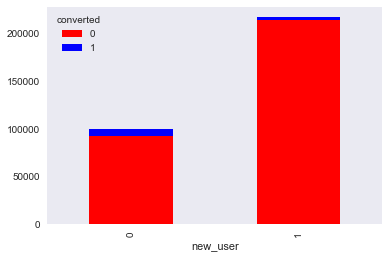

In [16]:
%matplotlib inline
temp = pd.crosstab([df['new_user']], df['converted'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
pyplot.show()

In [17]:
temp

converted,0,1
new_user,,
0,92295,7161
1,213705,3039


#### Surprisingly, return user are more likely to not convert.Therefore, there is a need to target the return users specifically by providing some sort of loyalty schemes. New users tend to convert.

In [18]:
print (df['age'].value_counts())

30     14346
28     14341
29     14158
27     14084
26     13931
31     13692
32     13507
25     13460
24     12960
33     12631
23     12336
34     12108
22     11701
35     11471
21     10966
36     10779
20     10156
37      9761
19      9349
38      8970
18      8466
39      8202
17      7597
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
77         1
79         1
111        1
73         1
72         1
123        1
Name: age, dtype: int64


In [19]:
ages = np.array(df['age'])
print("Mean age of users: ", ages.mean())
print("Standard deviation in the ages : ", ages.std())
print("Minimum age: ", ages.min())
print("Maximum age: ", ages.max())

Mean age of users:  30.569857685009488
Standard deviation in the ages :  8.271788721781903
Minimum age:  17
Maximum age:  123


#### Age of the users tend to be an average of 30 with a deviation of 8 years. Minimum age is 17 years. Maximum age is 123 years. This number seems to be an error so it would be advisable to drop such erroneous data. 

In [20]:
# drop unrealistic values of age -  eg : 111, 123
df = df[df["age"] <= 100]

In [21]:
ages = np.array(df['age'])
print("Mean age of users:       ", ages.mean())
print("Standard deviation in the ages :", ages.std())
print("Minimum age:    ", ages.min())
print("Maximum age:    ", ages.max())

Mean age of users:        30.569311001334608
Standard deviation in the ages : 8.268944520810427
Minimum age:     17
Maximum age:     79


#### After dropping erroneous data, the maximum age now is 79 years. This number seems more realistic.

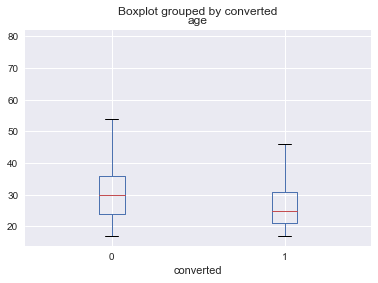

In [22]:
df.boxplot(column='age', by = 'converted')
pyplot.show()

#### The boxplot shows that the older users are more likely to not convert while their younger counterparts are more likely to convert.

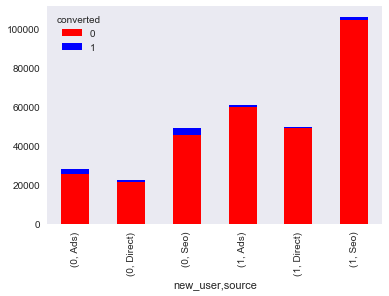

In [23]:
temp = pd.crosstab([df['new_user'], df['source']], df['converted'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
pyplot.show()

In [24]:
temp

converted             0     1
new_user source              
0        Ads      25706  2184
         Direct   21291  1387
         Seo      45298  3588
1        Ads      59974   875
         Direct   49089   653
         Seo     104642  1511

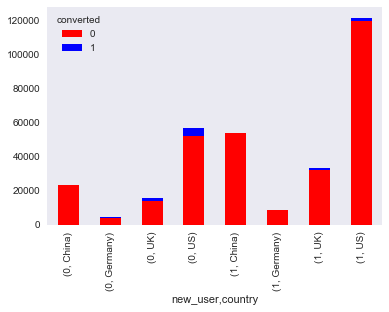

In [25]:
temp = pd.crosstab([df['new_user'], df['country']], df['converted'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
pyplot.show()

In [26]:
temp

converted              0     1
new_user country              
0        China     23028    66
         Germany    3625   588
         UK        13738  1773
         US        51904  4732
1        China     53472    36
         Germany    8615   227
         UK        32162   776
         US       119456  2000

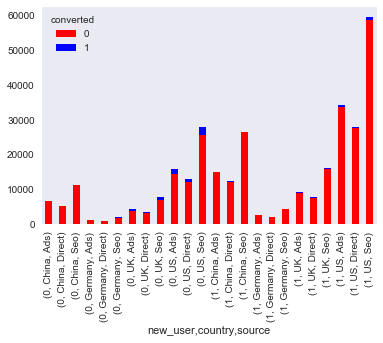

In [27]:
temp = pd.crosstab([ df['new_user'],df['country'],df['source']], df['converted'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
pyplot.show()

In [28]:
temp

converted                    0     1
new_user country source             
0        China   Ads      6519    22
                 Direct   5248    14
                 Seo     11261    30
         Germany Ads      1035   189
                 Direct    797   105
                 Seo      1793   294
         UK      Ads      3762   538
                 Direct   3169   331
                 Seo      6807   904
         US      Ads     14390  1435
                 Direct  12077   937
                 Seo     25437  2360
1        China   Ads     15010    10
                 Direct  12191    10
                 Seo     26271    16
         Germany Ads      2474    62
                 Direct   1914    48
                 Seo      4227   117
         UK      Ads      9004   213
                 Direct   7447   184
                 Seo     15711   379
         US      Ads     33486   590
                 Direct  27537   411
                 Seo     58433   999

#### The plots above provide deeper understanding into the distribution of data across various combination of features helping us make an informed decision in order to optimize the conversion rate.

## Prediction Models
#### The prediction at hand is a binary classification problem and the prediction is made for the "converted"  column. Thus, in turn predicting conversion rate. As mentioned above, the data is skewed that is there is an uneven class distribution. Due to this reason, F-Score is being utilised as the evaluation metric instead of accuracy. F1 Score is needed as we seek to strike a balance between Precision and Recall. If a simple model predicts that the entire test sample of signed-in users during a session will not be converted, the model would still have a 96% accuracy. The model would also hope to improve on this accuracy.

In [29]:
#Predictiors - country, age, new_user, source, total_pages_visited
x = df.iloc[:, :-1]
#Dependent variable - converted
y = df.iloc[:, -1]

In [30]:
#Randomly split the data set into trainset : testset => Ratio = 0.67 : 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [31]:
print(y_test.value_counts())

0    100964
1      3382
Name: converted, dtype: int64


In [32]:
print(y_train.value_counts())

0    205036
1      6816
Name: converted, dtype: int64


In [33]:
#Retrieving numerical value based predictors
x_train_numerical = x_train.select_dtypes(include = np.number).copy()

In [34]:
x_train_numerical_indices = x_train_numerical.index.values
y_train_numerical = y_train[y_train.index.isin(x_train_numerical_indices)]

In [35]:
x_test_numerical = x_test.select_dtypes(include = np.number).copy()

In [36]:
x_test_numerical_indices = x_test_numerical.index.values
y_test_numerical = y_test[y_test.index.isin(x_test_numerical_indices)]

In [37]:
x_selected = x_train.loc[:,x_train.nunique().sort_values()< 50]
cat_cols = list(x_selected.select_dtypes(['object']).columns.values)
x_categorical = x_selected[cat_cols].apply(lambda x: x.astype('category').cat.codes)

In [38]:
x_train_selected = x_train_numerical.join(x_categorical)

In [39]:
x_test_selected = x_test.loc[:,x_test.nunique().sort_values() < 50]
cat_cols = list(x_test_selected.select_dtypes(['object']).columns.values)
x_test_categorical = x_test_selected[cat_cols].apply(lambda x:x.astype('category').cat.codes)
x_test_selected = x_test_numerical.join(x_test_categorical)

#### Starting with simpler classifier like Decision Tree and Logistic Regression. Decision Tree works well when predictors are cataegorical in nature like source, country, new_user. However, logistic regression is more robust to noise.

In [40]:
DTclf= DecisionTreeClassifier()
DTclf.fit(x_train_selected,y_train) #Fitting the model on the training data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

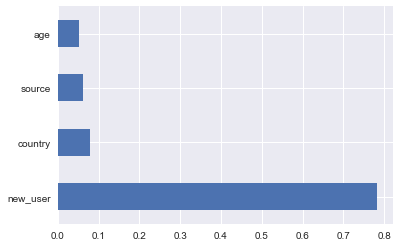

In [41]:
%matplotlib inline
#Plotting importance of each feature in the model
feat_importances = pd.Series(DTclf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

#### Whether user is new or returning seems to have the most sway on whether the user will convert or not. 

In [42]:
y_pred = DTclf.predict(x_test_selected) #Predicting on test set 
accuracy = accuracy_score(y_test, y_pred) #Get Accuracy
print('Accuracy: %.2f' % (accuracy*100))
print('F-Score: %.2f' % f1_score(y_test, y_pred))#Get F-Score
print(classification_report(y_pred, y_test))

Accuracy: 98.36
F-Score: 0.72
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    101685
           1       0.64      0.81      0.72      2661

   micro avg       0.98      0.98      0.98    104346
   macro avg       0.82      0.90      0.85    104346
weighted avg       0.99      0.98      0.98    104346



In [43]:
#Visualise confusion Matrix 
cf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

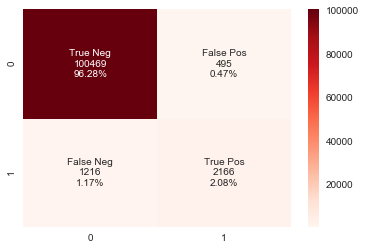

In [44]:
%matplotlib inline
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

In [45]:
LRclf = LogisticRegression()
LRclf.fit(x_train_selected,y_train)
y_pred = LRclf.predict(x_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
print('F-Score: %.2f' % f1_score(y_test, y_pred))
print(classification_report(y_pred, y_test))

C:\Users\Shriya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 98.54
F-Score: 0.75
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    101665
           1       0.67      0.85      0.75      2681

   micro avg       0.99      0.99      0.99    104346
   macro avg       0.83      0.92      0.87    104346
weighted avg       0.99      0.99      0.99    104346



In [46]:
cf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

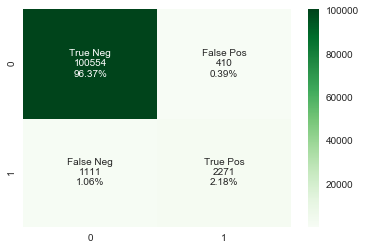

In [47]:
%matplotlib inline
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

#### Logistic Regression model performs better than the Decision Tree model in terms of f-score and accuracy.
#### Ensemble models are explored next - Random Forest, Ada Boost and Bagging based clasifiers. Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. 

In [48]:
RFclf = RandomForestClassifier(max_depth = 20, 
                             n_estimators = 30, 
                             n_jobs = -1)
RFclf.fit(x_train_selected,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

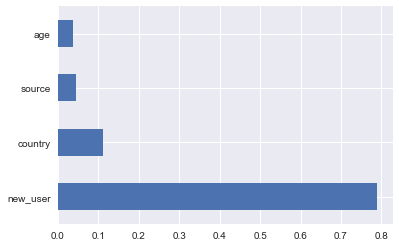

In [49]:
%matplotlib inline
feat_importances = pd.Series(RFclf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

In [50]:
y_pred = RFclf.predict(x_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
print('F-Score: %.2f' % f1_score(y_test, y_pred))
print(classification_report(y_pred, y_test))

Accuracy: 98.41
F-Score: 0.73
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    101515
           1       0.67      0.80      0.73      2831

   micro avg       0.98      0.98      0.98    104346
   macro avg       0.83      0.90      0.86    104346
weighted avg       0.99      0.98      0.98    104346



In [51]:
cf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

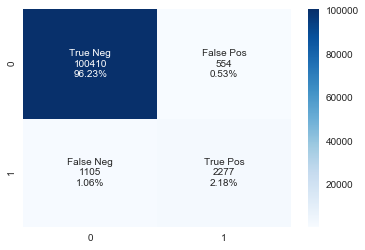

In [52]:
%matplotlib inline
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [53]:
ABclf= AdaBoostClassifier()
ABclf.fit(x_train_selected,y_train)
y_pred = ABclf.predict(x_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
print('F-Score: %.2f' % f1_score(y_test, y_pred))
print(classification_report(y_pred, y_test))

Accuracy: 98.59
F-Score: 0.76
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    101590
           1       0.69      0.85      0.76      2756

   micro avg       0.99      0.99      0.99    104346
   macro avg       0.84      0.92      0.88    104346
weighted avg       0.99      0.99      0.99    104346



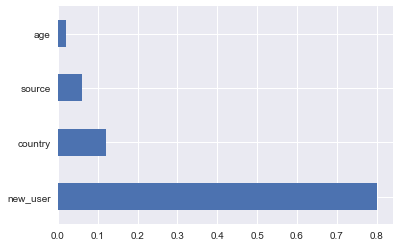

In [54]:
%matplotlib inline
feat_importances = pd.Series(ABclf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

In [55]:
cf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

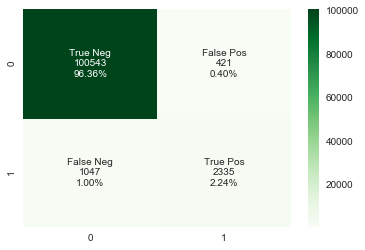

In [56]:
%matplotlib inline
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [57]:
Bclf = BaggingClassifier()
Bclf.fit(x_train_selected,y_train)
y_pred = Bclf.predict(x_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
print('F-Score: %.2f' % f1_score(y_test, y_pred))
print(classification_report(y_pred, y_test))

Accuracy: 98.40
F-Score: 0.73
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    101539
           1       0.67      0.80      0.73      2807

   micro avg       0.98      0.98      0.98    104346
   macro avg       0.83      0.90      0.86    104346
weighted avg       0.99      0.98      0.98    104346



In [58]:
cf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

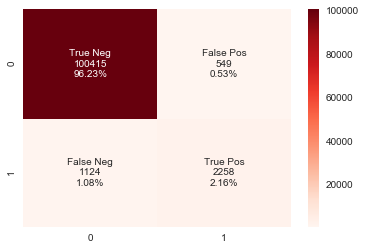

In [59]:
%matplotlib inline
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

#### AdaBoost model performs best out of the lot and achieves a F-Score of 0.76. Surprisingly, Random Forest and Bagging based classifiers perform worse than the simpler Logistic Regression classifier. 

## Recommendations
#### 1. The most crucial ascpect in determining whether user will convert is whether they are repeat users. Repeat users are likely not  to convert and new users are more likely to convert. It would be essential to attract more new users to the website in order to increase conversion rate. This should be supplemented by coming up with ideas to get return users to convert.
#### 2. US provides the maximum number of converted users. Targeting the users based in US would be fruitful in efforts to increase conversion rate.
#### 3. SEO is the most popular source for users that convert. It would be sensible to invest in potentially scaling it even further.
#### 4. Users in China are least likely to convert even though it has the second largest user base. This seems to be a hindrance when trying to increase conversion rate. Users in China which are likely to convert are routed to website via SEO. Therefore, focusing on optimising this source specially in China would help increase conversion rate.
#### 5. Younger user base is more likely to convert when compared to the older user base. Marketing should target older user base to increase popularity of the website in that age group and also increase their engagement. This would help increase the likelihood of them converting as increased engagement positively affects the chances of conversion.